IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

LOAD CSV DATASET

In [ ]:
data = pd.read_csv("/content/Swms.csv")

print("Dataset Loaded Successfully")
print(data.head(24))

Dataset Loaded Successfully
     Time  Garbage Level (%)  Distance(Ultrasonic) Bin State
0   08:00                  5                    18        OK
1   09:00                 10                    17        OK
2   10:00                 20                    15        OK
3   11:00                 35                    13        OK
4   12:00                 50                    11        OK
5   13:00                 85                     8      FULL
6   14:00                  5                    18        OK
7   15:00                 15                    16        OK
8   16:00                 30                    14        OK
9   17:00                 80                    11      FULL
10  18:00                  5                    18        OK
11  19:00                 20                    16        OK
12  20:00                 40                    13        OK
13  21:00                 90                    10      FULL
14  22:00                  5                    18       

DATA PREPROCESSING

In [ ]:
data["Time"] = data["Time"].astype(str).str.strip()

# Extract hour from Time (00 to 23)
data["hour"] = data["Time"].str.split(":").str[0].astype(int)

# Sort by hour
data = data.sort_values("hour")

In [ ]:
X = data[["hour", "Distance(Ultrasonic)"]]
y = data["Garbage Level (%)"]

LINEAR REGRESSION MODEL

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X, y)

lr_pred = lr_model.predict(X)

lr_mse = mean_squared_error(y, lr_pred)
lr_r2 = r2_score(y, lr_pred)

print("\nLinear Regression Results")
print("MSE:", round(lr_mse, 3))
print("R² :", round(lr_r2, 3))


Linear Regression Results
MSE: 50.852
R² : 0.937


RANDOM FOREST MODEL

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X, y)

rf_pred = rf_model.predict(X)

rf_mse = mean_squared_error(y, rf_pred)
rf_r2 = r2_score(y, rf_pred)

print("\nRandom Forest Results")
print("MSE:", round(rf_mse, 3))
print("R² :", round(rf_r2, 3))


Random Forest Results
MSE: 10.585
R² : 0.987


SCATTER GRAPH (Actual vs Linear vs Random)

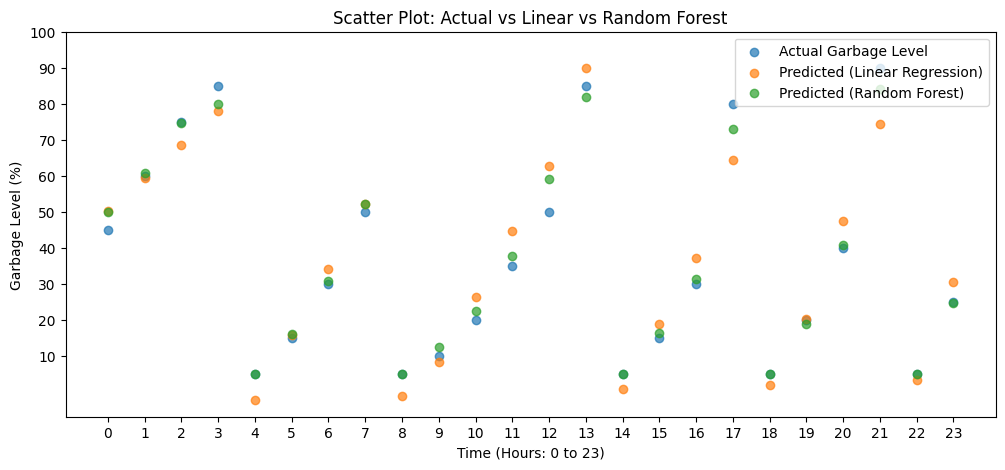

In [ ]:
plt.figure(figsize=(12,5))

plt.scatter(data["hour"], y,
            label="Actual Garbage Level", alpha=0.7)

plt.scatter(data["hour"], lr_pred,
            label="Predicted (Linear Regression)", alpha=0.7)

plt.scatter(data["hour"], rf_pred,
            label="Predicted (Random Forest)", alpha=0.7)

plt.xlabel("Time (Hours: 0 to 23)")
plt.ylabel("Garbage Level (%)")
plt.title("Scatter Plot: Actual vs Linear vs Random Forest")

plt.xticks(range(0,24))
plt.yticks(range(10,101,10))

plt.legend()
plt.show()

LINE GRAPH (Actual vs Linear vs Random)

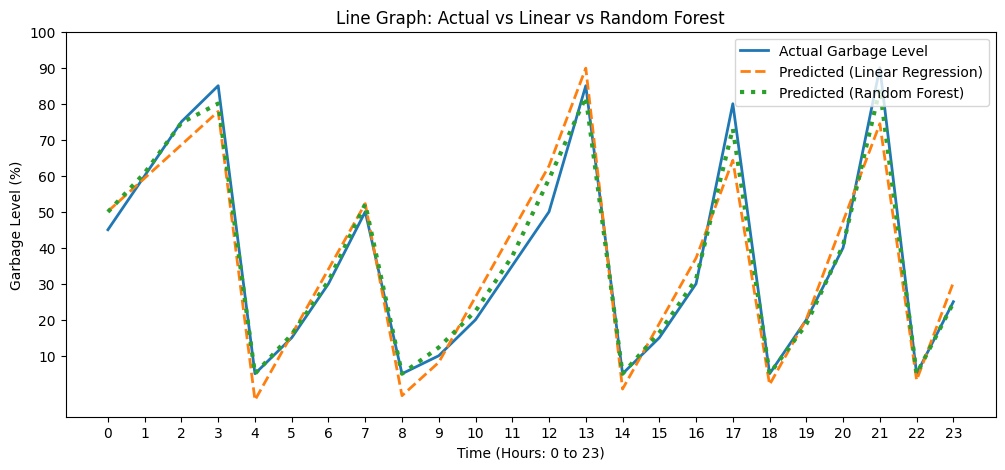

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(data["hour"], y,
         label="Actual Garbage Level", linewidth=2)

plt.plot(data["hour"], lr_pred,
         label="Predicted (Linear Regression)",
         linestyle="--", linewidth=2)

plt.plot(data["hour"], rf_pred,
         label="Predicted (Random Forest)",
         linestyle=":", linewidth=3)

plt.xlabel("Time (Hours: 0 to 23)")
plt.ylabel("Garbage Level (%)")
plt.title("Line Graph: Actual vs Linear vs Random Forest")

plt.xticks(range(0,24))
plt.yticks(range(10,101,10))

plt.legend()
plt.show()

FINAL RESULT & CONCLUSION

In [ ]:
print("\nFINAL RESULT & CONCLUSION")

if lr_mse < rf_mse and lr_r2 > rf_r2:
    print("Linear Regression predicts better than Random Forest.")
else:
    print("Random Forest predicts better than Linear Regression.")

print(
    "\nThe best model is selected based on lower Mean Squared Error (MSE), "
    "higher R² score, and visual closeness to the actual garbage level "
    "in both scatter and line graphs."
)


FINAL RESULT & CONCLUSION
Random Forest predicts better than Linear Regression.

The best model is selected based on lower Mean Squared Error (MSE), higher R² score, and visual closeness to the actual garbage level in both scatter and line graphs.
